In [89]:
import re
import string
import nltk
import nlpaug.augmenter.word as naw
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('cybertroll.csv')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


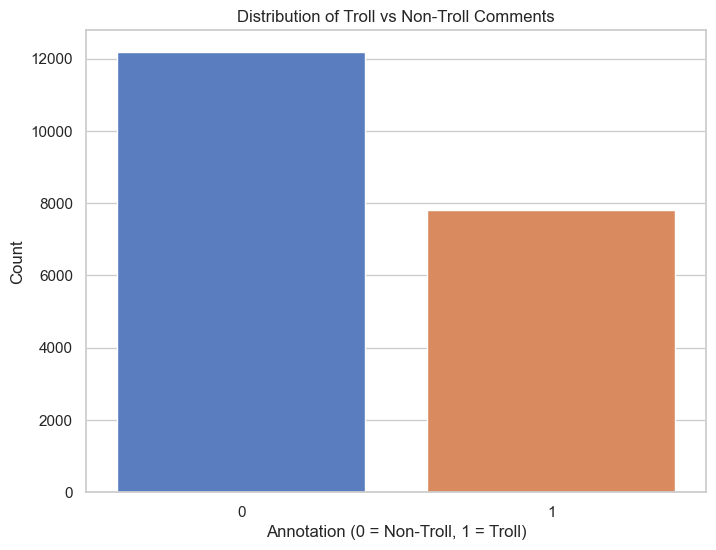

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='annotation', data=df, palette='muted')
plt.title('Distribution of Troll vs Non-Troll Comments')
plt.xlabel('Annotation (0 = Non-Troll, 1 = Troll)')
plt.ylabel('Count')
plt.show()


In [91]:
print("Sample Non-Troll Comments:")
print(df[df['annotation'] == 0]['content'].sample(3, random_state=42).tolist())

print("\nSample Troll Comments:")
print(df[df['annotation'] == 1]['content'].sample(3, random_state=42).tolist())


Sample Non-Troll Comments:
[" I was gonna dedicate my 850th tweet to you but then I was all FUCK  I already tweeted! But it was to you anyway so it's cool :D", ' today its warm though  crazy ass Cali weather', ' Fear. Only because of the corruptness of it all.']

Sample Troll Comments:
[' I brought Prussia back  bitch.', ' That sucks... Can you use it on your iphone?', ' yea dani thats kind of gay sorry to tel u lol']


In [92]:
import pandas as pd
import re
import contractions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from imblearn.over_sampling import RandomOverSampler


# Load SpaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    # 1. Expand contractions
    text = contractions.fix(text)
    
    # 2. Convert to lowercase
    text = text.lower()
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # 4. Remove special characters and punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # 5. Tokenize
    tokens = word_tokenize(text)
    
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 7. NER (Named Entity Recognition) - Remove named entities
    doc = nlp(" ".join(tokens))
    tokens = [token.text for token in doc if token.ent_type_ == ""]
    
    return " ".join(tokens)

# Apply preprocessing to the dataframe
df['processed_content'] = df['content'].apply(preprocess)

print("Before balancing:")
print(df)



Before balancing:
                                                 content  annotation  \
0                                 Get fucking real dude.           1   
1       She is as dirty as they come  and that crook ...           1   
2       why did you fuck it up. I could do it all day...           1   
3       Dude they dont finish enclosing the fucking s...           1   
4       WTF are you talking about Men? No men thats n...           1   
...                                                  ...         ...   
19996   I dont. But what is complaining about it goin...           0   
19997   Bahah  yeah i&;m totally just gonna&; get pis...           0   
19998       hahahahaha >:) im evil mwahahahahahahahahaha           0   
19999            What&;s something unique about Ohio? :)           0   
20000              Who is the biggest gossiper you know?           0   

                                       processed_content  
0                                  get fucking real dude  

In [93]:
# 8. Balance dataset using RandomOverSampler
X = df[['processed_content']]
y = df['annotation']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled data into a new dataframe
df= pd.concat([X_resampled, y_resampled], axis=1)

print("\nAfter balancing:")
df


After balancing:


,processed_content,annotation
0,get fucking real dude,1
1,she is a dirty a they come and that crook reng...,1
2,why did you fuck it up i could do it all day t...,1
3,dude they do not finish enclosing the fucking ...,1
4,wtf are you talking about men no men that is n...,1
...,...,...
24353,ugh fuck the charger,1
24354,damn that suck,1
24355,fat as,1
24356,lock it yank his right on both his account he ...,1


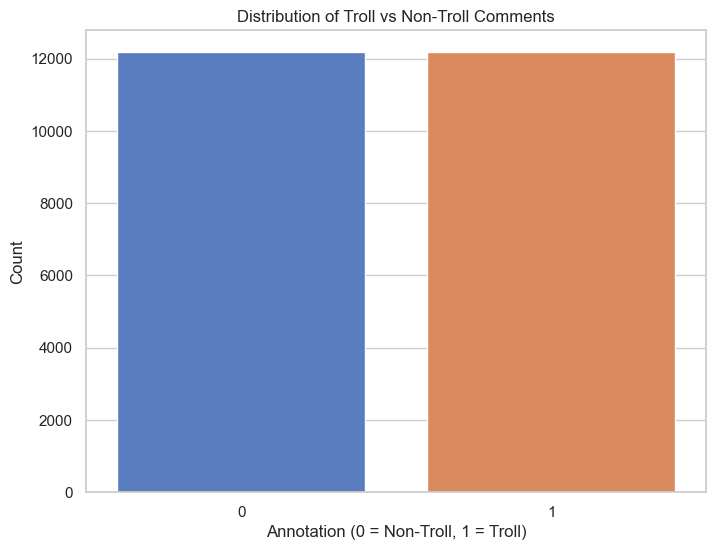

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='annotation', data=df, palette='muted')
plt.title('Distribution of Troll vs Non-Troll Comments')
plt.xlabel('Annotation (0 = Non-Troll, 1 = Troll)')
plt.ylabel('Count')
plt.show()


In [95]:
df = df.sample(frac = 1)
df

,processed_content,annotation
2009,scanman and asthepumpturns yeah i am a mean me...,1
10934,staying home with my oh the pooch and the fire...,0
17746,both but usuallly make them,0
9254,what is with the lack of internet is it comcas...,0
9541,your chappy is fucking gorgeous inside and out...,0
...,...,...
21575,name,1
5390,another downside to living in dsm but working ...,1
860,yeah dat bitch stabbed me in my eye when i wa ...,1
15795,i see you still like,0


In [96]:
from sklearn.model_selection import train_test_split
tdf, df = train_test_split(df, test_size=0.2, random_state=42)


In [97]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertModel
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch


In [99]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertModel
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Initialize tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize function
def tokenize(batch):
    return tokenizer(batch['processed_content'], padding=True, truncation=True, max_length=128)

# Dataset class to handle tokenization and batching
class TextDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.labels = torch.tensor(df['annotation'].values)
        self.texts = df['processed_content'].tolist()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}  # Remove batch dimension
        encoding['labels'] = self.labels[idx]
        return encoding

# Prepare data
train_df, val_df = train_test_split(tdf, test_size=0.1, random_state=42)

train_dataset = TextDataset(train_df, tokenizer)
val_dataset = TextDataset(val_df, tokenizer)

# Load DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    warmup_steps=1000,
    weight_decay=0.0004,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=1,
    save_strategy="epoch"
)


# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=None  # None for standard batching behavior
)

# Training with progress tracking using tqdm
with tqdm(total=training_args.num_train_epochs) as pbar:
    trainer.train()
    pbar.update(training_args.num_train_epochs)

# Save the model after training
model.save_pretrained("./finetuned_model")
tokenizer.save_pretrained("./finetuned_model")

# To get the embeddings for df and tdf after finetuning
def get_bert_embeddings(df, model, tokenizer, max_length=128):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for text in tqdm(df['processed_content'], desc="Generating embeddings"):
            encoding = tokenizer(text, truncation=True, padding="max_length", max_length=max_length, return_tensors="pt")
            encoding = {key: val.to(device) for key, val in encoding.items()}
            output = model.distilbert(**encoding)
            embeddings.append(output.last_hidden_state.mean(dim=1).cpu().numpy())  # Mean pooling
    return embeddings

# Generate embeddings for df
df['bert_embeddings'] = get_bert_embeddings(df, model, tokenizer)

# Generate embeddings for tdf
tdf['bert_embeddings'] = get_bert_embeddings(tdf, model, tokenizer)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10970 [00:00<?, ?it/s]

{'loss': 0.6924, 'grad_norm': 1.0627766847610474, 'learning_rate': 5.000000000000001e-07, 'epoch': 0.01}
{'loss': 0.6919, 'grad_norm': 1.001573920249939, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.02}
{'loss': 0.6956, 'grad_norm': 1.0065730810165405, 'learning_rate': 1.5e-06, 'epoch': 0.03}
{'loss': 0.6883, 'grad_norm': 1.3366529941558838, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.04}
{'loss': 0.6937, 'grad_norm': 1.3015053272247314, 'learning_rate': 2.5e-06, 'epoch': 0.05}
{'loss': 0.6922, 'grad_norm': 1.1546533107757568, 'learning_rate': 3e-06, 'epoch': 0.05}
{'loss': 0.6909, 'grad_norm': 1.4683008193969727, 'learning_rate': 3.5000000000000004e-06, 'epoch': 0.06}
{'loss': 0.6864, 'grad_norm': 2.9054503440856934, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.07}
{'loss': 0.6869, 'grad_norm': 1.0725878477096558, 'learning_rate': 4.5e-06, 'epoch': 0.08}
{'loss': 0.6897, 'grad_norm': 0.9907464385032654, 'learning_rate': 5e-06, 'epoch': 0.09}
{'loss': 0.6845, 'grad

Generating embeddings:   0%|          | 0/4872 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/19486 [00:00<?, ?it/s]

In [100]:
import fasttext
import numpy as np
fasttext_model = fasttext.load_model("cc.en.300.bin")

# Extract FastText embeddings
def get_fasttext_embeddings(texts):
    embeddings = []
    for text in tqdm(texts, desc="Generating FastText embeddings"):
        tokens = text.split()
        if tokens:
            embedding = np.mean([fasttext_model.get_word_vector(token) for token in tokens], axis=0)
        else:
            embedding = np.zeros(fasttext_model.get_dimension())
        embeddings.append(embedding)
    return embeddings

# Generate FastText embeddings for the dataframes
df['fasttext_embeddings'] = get_fasttext_embeddings(df['processed_content'])
tdf['fasttext_embeddings'] = get_fasttext_embeddings(tdf['processed_content'])

# Combine BERT and FastText embeddings
def combine_embeddings(bert_embeds, fasttext_embeds):
    return [np.concatenate([bert.squeeze(), fasttext]) for bert, fasttext in zip(bert_embeds, fasttext_embeds)]

# Create combined embeddings for df and tdf
df['combined_embedding'] = combine_embeddings(df['bert_embeddings'], df['fasttext_embeddings'])
tdf['combined_embedding'] = combine_embeddings(tdf['bert_embeddings'], tdf['fasttext_embeddings'])


Generating FastText embeddings:   0%|          | 0/4872 [00:00<?, ?it/s]

Generating FastText embeddings:   0%|          | 0/19486 [00:00<?, ?it/s]

In [101]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

# Define the Multi-Scale CNN model
class MultiScaleCNN(nn.Module):
    def __init__(self, input_dim, num_filters=64, filter_sizes=[3, 5, 7]):
        super(MultiScaleCNN, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=fs, padding=fs // 2)
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), input_dim)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = x.unsqueeze(1)  # Add a channel dimension -> (batch_size, 1, input_dim)
        conv_outputs = [torch.relu(conv(x)) for conv in self.convs]  # Apply each convolution
        pooled_outputs = [torch.mean(out, dim=2) for out in conv_outputs]  # Global average pooling
        combined = torch.cat(pooled_outputs, dim=1)  # Concatenate outputs
        return self.fc(combined)  # Final linear transformation

# Function to generate CNN embeddings
def get_cnn_embeddings(data, model, device):
    model.to(device)
    model.eval()
    cnn_embeddings = []
    
    for embedding in tqdm(data['combined_embedding'], desc="Generating CNN embeddings"):
        embedding_tensor = torch.tensor(embedding, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            cnn_embed = model(embedding_tensor).cpu().numpy().squeeze()
        cnn_embeddings.append(cnn_embed)
    
    return cnn_embeddings

# Determine the input dimension dynamically from the combined embeddings
input_dim = len(tdf['combined_embedding'].iloc[0])

# Initialize the CNN model
cnn_model = MultiScaleCNN(input_dim=input_dim)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate CNN embeddings for both tdf and df
tdf['cnn_embeddings'] = get_cnn_embeddings(tdf, cnn_model, device)
df['cnn_embeddings'] = get_cnn_embeddings(df, cnn_model, device)

Generating CNN embeddings: 100%|██████████| 4872/4872 [00:10<00:00, 444.93it/s]


In [102]:
import torch.nn as nn

class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the FFNN model
input_size = len(df['combined_embedding'].iloc[0])
hidden_size = 128
output_size = 64
ffnn = FFNN(input_size, hidden_size, output_size).to(device)

# Extract features using FFNN
def get_extracted_features(combined_embeddings):
    ffnn.eval()
    features = []
    for embedding in tqdm(combined_embeddings, desc="Extracting features"):
        with torch.no_grad():
            tensor = torch.tensor(embedding, dtype=torch.float32).to(device)
            feature = ffnn(tensor).cpu().numpy()
            features.append(feature)
    return features

# Generate extracted features for df and tdf
df['extracted_features'] = get_extracted_features(df['combined_embedding'])
tdf['extracted_features'] = get_extracted_features(tdf['combined_embedding'])

Extracting features: 100%|██████████| 19486/19486 [00:30<00:00, 641.77it/s]


In [103]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pearsonr

# --- Helper Functions ---
def eig_selection(features, annotations, num_features):
    """
    Perform feature selection using Expected Information Gain (EIG).
    """
    eig_scores = mutual_info_classif(features, annotations)
    selected_indices = np.argsort(eig_scores)[-num_features:]
    return features[:, selected_indices]

def ant_colony_optimization(features, num_features, num_ants=20, iterations=10, evaporation_rate=0.5, alpha=1, beta=1):
    """
    Perform feature selection using Ant Colony Optimization (ACO).
    """
    num_original_features = features.shape[1]
    pheromone = np.ones(num_original_features)

    for _ in tqdm(range(iterations), desc="ACO iterations"):
        solutions = []
        scores = []

        for _ in range(num_ants):
            probabilities = (pheromone ** alpha) * ((1.0 / np.std(features, axis=0)) ** beta)
            probabilities /= probabilities.sum()
            selected = np.random.choice(num_original_features, num_features, replace=False, p=probabilities)
            solutions.append(selected)
            scores.append(np.sum(np.std(features[:, selected], axis=0)))  # Example scoring metric

        best_solution = solutions[np.argmax(scores)]

        pheromone *= (1 - evaporation_rate)
        for idx in best_solution:
            pheromone[idx] += 1  # Reinforce the pheromone

    return features[:, best_solution]

def pcc_reduction(features, num_features):
    """
    Perform feature selection using Pearson Correlation Coefficient (PCC).
    """
    corr_matrix = np.abs(np.corrcoef(features, rowvar=False))
    feature_scores = np.sum(corr_matrix, axis=0) - 1  # Exclude self-correlation
    selected_indices = np.argsort(feature_scores)[-num_features:]
    return features[:, selected_indices]

# --- Main Workflow ---
def feature_selection_pipeline(df, tdf, target_column, eig_features=30, aco_features=15, pcc_features=10):
    """
    Perform the complete feature selection pipeline on df and tdf.
    """
    for dataframe in [df, tdf]:
        features = np.vstack(dataframe['extracted_features'].values)
        annotations = dataframe[target_column].values

        # Step 1: EIG
        eig_selected = eig_selection(features, annotations, eig_features)

        # Step 2: ACO
        aco_selected = ant_colony_optimization(eig_selected, aco_features)

        # Step 3: PCC
        final_selected = pcc_reduction(aco_selected, pcc_features)

        # Store the selected features
        dataframe['selected_features'] = list(final_selected)

# --- Example Usage ---
# Assuming df and tdf are defined and have 'extracted_features' and 'annotations' columns
feature_selection_pipeline(df, tdf, target_column='annotation')


ACO iterations: 100%|██████████| 10/10 [00:00<00:00, 18.51it/s]


In [110]:
df['selected_features'][10228].shape

(10,)

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# --- Small Attention NN ---
class AttentionNN(nn.Module):
    def __init__(self, input_dim):
        super(AttentionNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        scores = self.linear(x)  # Get importance scores
        attention_weights = F.softmax(scores, dim=1)  # Normalize using softmax
        weighted_features = x * attention_weights  # Weight the features
        return weighted_features

# --- Feature Weighting ---
def create_weighted_feature_vectors(dataframe):
    """
    Create weighted feature vectors for a given dataframe with TQDM progress bars.
    """
    features = torch.tensor(np.vstack(dataframe['selected_features'].values), dtype=torch.float32)
    attention_model = AttentionNN(features.shape[1])

    weighted_features = []
    print("Creating weighted feature vectors:")
    for feature_vector in tqdm(features, desc="Processing vectors", unit="vector"):
        with torch.no_grad():  # No need to train the attention model in this case
            weighted_feature = attention_model(feature_vector.unsqueeze(0)).numpy()
        weighted_features.append(weighted_feature)

    return np.vstack(weighted_features)

# --- Ensemble Classifier ---
def train_ensemble(X_train, y_train):
    """
    Train an ensemble of NN, RF, and SVM with a Logistic Regression meta-classifier.
    """
    print("Training Neural Network:")
    nn_model = nn.Sequential(
        nn.Linear(X_train.shape[1], 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )

    optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

    nn_model.train()
    for epoch in tqdm(range(100), desc="Training NN", unit="epoch"):
        optimizer.zero_grad()
        outputs = nn_model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    nn_preds = (nn_model(X_train_tensor).detach().numpy() > 0.5).astype(int)

    print("Training Random Forest:")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_train)

    print("Training SVM:")
    svm_model = SVC(probability=True)
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_train)

    print("Training Meta Classifier:")
    meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds]).T
    meta_model = LogisticRegression()
    meta_model.fit(meta_features, y_train)

    return nn_model, rf_model, svm_model, meta_model

# --- Evaluate Model ---
def evaluate_ensemble(models, X, y):
    """
    Evaluate the ensemble model on test data with TQDM.
    """
    nn_model, rf_model, svm_model, meta_model = models

    print("Evaluating Neural Network:")
    nn_preds = []
    for x in tqdm(X, desc="NN Predictions", unit="sample"):
        with torch.no_grad():
            pred = nn_model(torch.tensor(x, dtype=torch.float32)).numpy() > 0.5
        nn_preds.append(pred)
    nn_preds = np.array(nn_preds).astype(int)

    print("Evaluating Random Forest:")
    rf_preds = rf_model.predict(X)

    print("Evaluating SVM:")
    svm_preds = svm_model.predict(X)

    print("Combining Predictions:")
    meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds]).T
    final_preds = meta_model.predict(meta_features)

    print("Confusion Matrix:")
    print(confusion_matrix(y, final_preds))

    print("Classification Report:")
    print(classification_report(y, final_preds))

    print("Other Metrics:")
    print(f"Accuracy: {accuracy_score(y, final_preds):.4f}")
    print(f"F1 Score: {f1_score(y, final_preds, average='weighted'):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, meta_model.predict_proba(meta_features)[:, 1]):.4f}")

# --- Main Workflow ---
def main_pipeline(df, tdf):
    """
    Main pipeline for weighted attention feature vector and ensemble classification.
    """
    print("Processing train data:")
    X_train = create_weighted_feature_vectors(tdf)
    y_train = tdf['annotation'].values

    print("Processing test data:")
    X_test = create_weighted_feature_vectors(df)
    y_test = df['annotation'].values

    print("Training ensemble model:")
    models = train_ensemble(X_train, y_train)

    print("Evaluating on train data:")
    evaluate_ensemble(models, X_train, y_train)

    print("Evaluating on test data:")
    evaluate_ensemble(models, X_test, y_test)

# --- Example Usage ---
# Assuming df and tdf are already defined
main_pipeline(df, tdf)


Processing train data:
Creating weighted feature vectors:


Processing vectors: 100%|██████████| 19486/19486 [00:00<00:00, 29093.07vector/s]


Processing test data:
Creating weighted feature vectors:


Processing vectors: 100%|██████████| 4872/4872 [00:00<00:00, 25341.69vector/s]


Training ensemble model:
Training Neural Network:


Training NN: 100%|██████████| 100/100 [00:00<00:00, 164.72epoch/s]


Training Random Forest:
Training SVM:
Training Meta Classifier:
Evaluating on train data:
Evaluating Neural Network:


NN Predictions: 100%|██████████| 19486/19486 [00:01<00:00, 11604.02sample/s]


Evaluating Random Forest:
Evaluating SVM:
Combining Predictions:
Confusion Matrix:
[[9679   72]
 [  51 9684]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9751
           1       0.99      0.99      0.99      9735

    accuracy                           0.99     19486
   macro avg       0.99      0.99      0.99     19486
weighted avg       0.99      0.99      0.99     19486

Other Metrics:
Accuracy: 0.9937
F1 Score: 0.9937
ROC AUC: 0.9941
Evaluating on test data:
Evaluating Neural Network:


NN Predictions: 100%|██████████| 4872/4872 [00:00<00:00, 11189.83sample/s]


Evaluating Random Forest:
Evaluating SVM:
Combining Predictions:
Confusion Matrix:
[[2294  134]
 [ 549 1895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2428
           1       0.93      0.78      0.85      2444

    accuracy                           0.86      4872
   macro avg       0.87      0.86      0.86      4872
weighted avg       0.87      0.86      0.86      4872

Other Metrics:
Accuracy: 0.8598
F1 Score: 0.8588
ROC AUC: 0.9302


Processing train data:
Creating weighted feature vectors:


Processing vectors:   0%|          | 0/19486 [00:00<?, ?vector/s]

Processing vectors: 100%|██████████| 19486/19486 [00:00<00:00, 26230.55vector/s]


Processing test data:
Creating weighted feature vectors:


Processing vectors: 100%|██████████| 4872/4872 [00:00<00:00, 25077.00vector/s]


Training ensemble model:
Training Neural Network:


Training NN: 100%|██████████| 100/100 [00:00<00:00, 140.11epoch/s]


Training Random Forest:
Training SVM:
Training Meta Classifier:

--- Train Set Evaluation ---
Evaluating Neural Network:


NN Predictions: 100%|██████████| 19486/19486 [00:01<00:00, 11043.18sample/s]


Evaluating Random Forest:
Evaluating SVM:
Combining Predictions:
Confusion Matrix:
[[9679   72]
 [  51 9684]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9751
           1       0.99      0.99      0.99      9735

    accuracy                           0.99     19486
   macro avg       0.99      0.99      0.99     19486
weighted avg       0.99      0.99      0.99     19486

Other Metrics:
Accuracy: 0.9937
F1 Score: 0.9937
ROC AUC: 0.9965

--- Test Set Advanced Evaluation ---


NN Predictions: 100%|██████████| 4872/4872 [00:00<00:00, 10478.30sample/s]



--- Advanced Evaluation Metrics ---
Accuracy: 0.9304
Balanced Accuracy: 0.9303
F1 Score (Weighted): 0.9304
ROC AUC Score: 0.9335
Cohen's Kappa: 0.8608
Matthews Correlation Coefficient: 0.8617
Average Precision Score: 0.8973


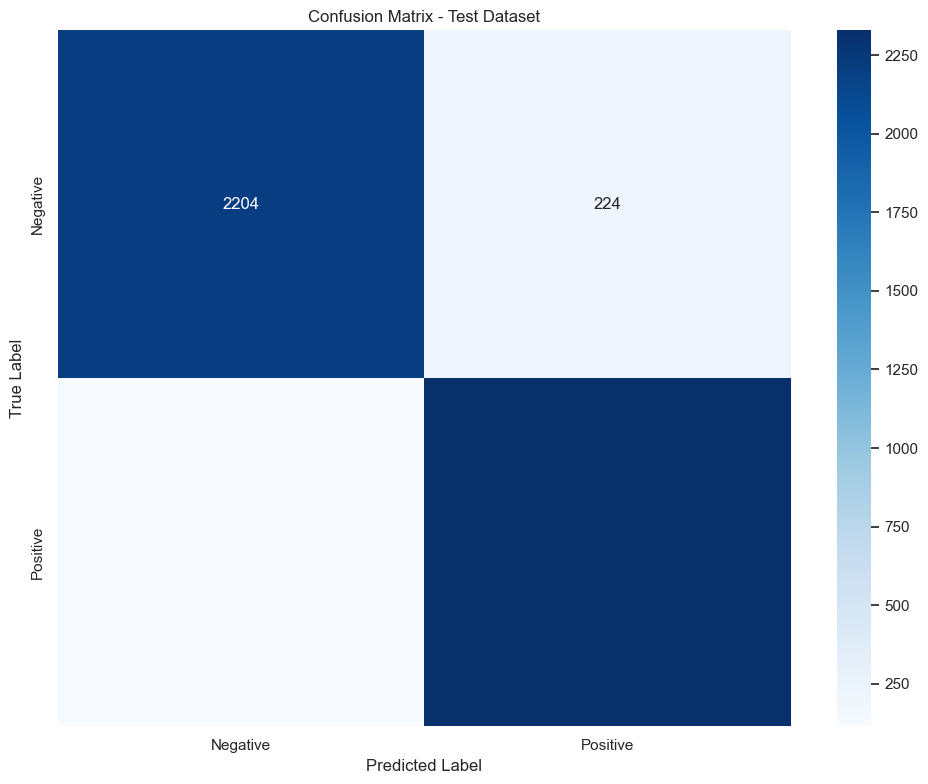


Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.91      0.93      2428
    Positive       0.91      0.95      0.93      2444

    accuracy                           0.93      4872
   macro avg       0.93      0.93      0.93      4872
weighted avg       0.93      0.93      0.93      4872



In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    f1_score, 
    accuracy_score,
    precision_recall_curve,
    average_precision_score,
    cohen_kappa_score,
    matthews_corrcoef,
    balanced_accuracy_score
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# [Previous classes and functions remain the same]

# --- Enhanced Evaluation Function ---
def advanced_evaluation(models, X, y, title=''):
    """
    Comprehensive model evaluation with advanced metrics and visualization.
    
    Args:
        models (tuple): Trained models (nn_model, rf_model, svm_model, meta_model)
        X (np.array): Test features
        y (np.array): Test labels
        title (str): Title for confusion matrix plot
    """
    nn_model, rf_model, svm_model, meta_model = models

    # Generate predictions
    nn_preds = []
    for x in tqdm(X, desc="NN Predictions", unit="sample"):
        with torch.no_grad():
            pred = nn_model(torch.tensor(x, dtype=torch.float32)).numpy() > 0.5
        nn_preds.append(pred)
    nn_preds = np.array(nn_preds).astype(int)

    rf_preds = rf_model.predict(X)
    svm_preds = svm_model.predict(X)

    # Combine predictions
    meta_features = np.vstack([nn_preds.ravel(), rf_preds, svm_preds]).T
    final_preds = meta_model.predict(meta_features)
    final_proba = meta_model.predict_proba(meta_features)[:, 1]

    # Advanced Metrics
    print("\n--- Advanced Evaluation Metrics ---")
    print(f"Accuracy: {accuracy_score(y, final_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y, final_preds):.4f}")
    print(f"F1 Score (Weighted): {f1_score(y, final_preds, average='weighted'):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y, final_proba):.4f}")
    
    # Additional Advanced Metrics
    print(f"Cohen's Kappa: {cohen_kappa_score(y, final_preds):.4f}")
    print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y, final_preds):.4f}")
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, final_proba)
    avg_precision = average_precision_score(y, final_proba)
    print(f"Average Precision Score: {avg_precision:.4f}")

    # Confusion Matrix Visualization
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Detailed Classification Report
    print("\nDetailed Classification Report:")
    print(classification_report(y, final_preds, 
                                target_names=['Negative', 'Positive']))

# --- Modified Main Workflow ---
def main_pipeline(df, tdf):
    """
    Main pipeline for weighted attention feature vector and ensemble classification.
    """
    print("Processing train data:")
    X_train = create_weighted_feature_vectors(tdf)
    y_train = tdf['annotation'].values

    print("Processing test data:")
    X_test = create_weighted_feature_vectors(df)
    y_test = df['annotation'].values

    print("Training ensemble model:")
    models = train_ensemble(X_train, y_train)

    print("\n--- Train Set Evaluation ---")
    evaluate_ensemble(models, X_train, y_train)

    print("\n--- Test Set Advanced Evaluation ---")
    advanced_evaluation(models, X_test, y_test, title='Test Dataset')

# --- Example Usage ---
# Assuming df and tdf are already defined
main_pipeline(df, tdf)